##Chomp

Chomp é um jogo de estratégia para 2 jogadores jogado em um tabuleiro retangular composto por blocos, parecido com uma barra de chocolate. A cada rodada, o jogador deve escolher um bloco para remover juntamente com todos os blocos que estão abaixo e ao seu lado direito. 
Perde o jogo quem sobrar para remover o ultimo bloco, no canto superior esquerdo do tabuleiro, representado como bloco "envenenado".

###Tabuleiro

O tabuleiro é composto por quadrados, como na imagem abaixo. Tipicamente, o tabuleiro é formado por 5 colunas e 4 linhas, porém ele pode ser diminuído ou aumentado sem problemas.
  
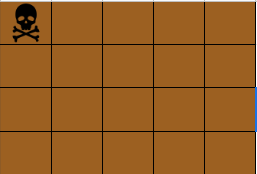


###Movimentos

O jogador da vez deve escolher um bloco para retirar, juntamente com os blocos abaixo e ao seu lado direito. Confira exemplos de movimentos possíveis abaixo:

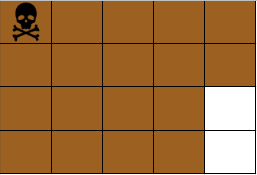

No exemplo acima, o jogador 1 escolheu remover o bloco na linha 3 coluna 5, removendo juntamente o bloco abaixo.

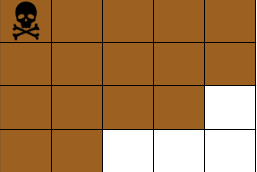

Continuando o jogo, o jogador -1 removeu o bloco da quarta linha, terceira coluna, removendo também, por regra, os blocos a direita.

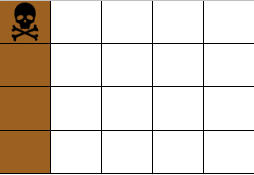

Dando continuidade, o jogador 1 decide remover o bloco da primeira linha, segunda coluna, removendo os demais abaixo e a direita.



###Vitória

Vence o jogo aquele que não remove o último bloco, fazendo com que o outro jogador remova o bloco "envenenado" e perca. Confira o exemplo, continuando o jogo que começamos na subseção anterior (Movimentos)

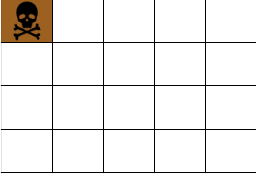

O jogador -1 escolheu remover o bloco na segunda linha, primeira coluna. Desse modo ele vence o jogo, já que o jogador 1 só pode escolher o bloco envenenado.

##Atividade 4


###Tabuleiro

Decidimos representar o tabuleiro com uma tupla de tuplas (matriz), para facilitar a visualização e manipulação de dados.
Vamos representa-lo inicalmente da forma mais comum, com 4 linhas e 5 colunas, mas isso pode ser alterado sem problemas
Cada célula do tabuleiro pode:
- Estar intacta, representada com 0
- Ter sido removida, representada pelo jogador que a removeu (-1 ou 1) 

Dessa forma, a seguir temos um tabuleiro vazio:

tabuleiro = (

              ( 0, 0, 0, 0, 0),

              ( 0, 0, 0, 0, 0),

              ( 0, 0, 0, 0, 0),

              ( 0, 0, 0, 0, 0)

)

A seguir temos um tabuleiro em que:
- o jogador 1 escolheu remover o bloco na linha 3 coluna 5, removendo juntamente o bloco abaixo
- o jogador -1 removeu o bloco da quarta linha, terceira coluna, removendo também, por regra, os blocos a direita.

tabuleiro = (

              (  0,  0,  0,  0,  0),

              (  0,  0,  0,  0,  0),

              (  0,  0,  0,  0,  1),

              (  0,  0, -1, -1,  1)

)

Assim, vamos implementar um tabuleiro vazio no nosso código dessa forma:


In [ ]:
##Tabuleiro vazio
tabuleiro = ((0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0))

###Vencedor
Como já explicado anteriormente, o vencedor é aquele que que não remove o último bloco, fazendo com que o outro jogador remova o bloco "envenenado" e perca. 

Dessa forma podemos dizer que o vencedor é aquele que não removeu a célula na posição [0][0].

A seguir, temos uma função que retorna quem venceu o jogo. É impossível ocorrer empates no nosso jogo, dessa forma não precisamos criar uma condição para esse caso.

In [ ]:
## Código que devolve o jogador vencedor
def winner(tab) :
  return (tab[0][0]*-1)

In [ ]:
## Exemplo de uso do que tempos até agora.
tabuleiro = ((1,1,1,1,1),(-1,1,1,1,1),(-1,1,1,1,1),(-1,1,-1,-1,1))
winner(tabuleiro)

-1

###Jogadas Válidas

Um jogador pode escolher qualquer célula para remover, desde que ela nao tenha sido removida posteriormente.  Nesse caso, podemos representar uma jogada válida como o índice de uma célula não removida.

Definindo nossa função que retorna as posições das jogadas válidas:

In [ ]:
## Função que devolve as jogadas válidas
def get_valid_moves(tab) :
  valids = []
  for i in range(len(tab)) :
    for j in range(len(tab[i])) :
      if tab[i][j] == 0 :
        valids.append((i,j))
  return valids

In [ ]:
tabuleiro = ((0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,1),(0,0,-1,-1,1))
get_valid_moves(tabuleiro)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1)]

###Efetuando jogadas

Com a finalidade de criar um jogador que efetuará jogadas ao acaso, somente é necessario informar dois dados, todas as jogadas validas no momento, e de quem é a vez de jogar "-1" ou "1".



In [ ]:
#função jogadas ao acaso
import random

## A função player recebe dois parâmetros, "tab" e "turn",
## turn indica qual jogador efetuará a jogada, -1 ou 1,
## e tab recebe como parâmetro um tabuleiro.
def player(tab, turn) :
  valid_moves = get_valid_moves(tab)
  if valid_moves :
    return (turn, random.choice(valid_moves))
    

In [ ]:
tabuleiro = ((0,0,0,0,0),(0,0,0,0,0),(1,1,1,1,1),(1,1,-1,-1,1))

## A função retornara qual jogador esta efetuando a jogada,
## seguida da posição escolhida
player(tabuleiro, -1)

(-1, (0, 0))

##Atividade 5

###Gerenciador de Jogo

O gerenciador irá:

- Garantir que pedirá para o jogador certo jogar (alternância entre jogadores).
- Gerenciar o tabuleiro de modo a fazer com que as jogadas sejam concretizadas.
- Verificar se as condições de vitória, derrota ou empates já foram satisfeitas.
- Armazenar um histórico de jogadas, para que os jogadores posteriormente possam analisar.

In [ ]:
## Função que gerencia um jogo. 
def game(player1, player2) :
    ## Inicialização
    turn   = 1
    tab    = ((0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0),(0,0,0,0,0))
    result = 0 

    ## Lista que guardará o histórico
    history = [] 

    ## Enquanto houverem jogadas, pedimos para o jogador vez prosseguir
    while get_valid_moves(tab) :

        ## Pedindo uma jogada ao jogador da vez.
        piece, pos = None, None
        if turn == 1 :
            piece, pos = player1(tab, turn)    
        else : 
            piece, pos = player2(tab, turn)
        
        ## Colocando a peça no tabuleiro
        ltab = list(tab)
        for linha in range(len(ltab)) :
          for coluna in range(len(ltab[linha])) :
            if ltab[linha][coluna] == 0 and linha >= pos[0] and coluna >= pos[1] :
              #print(linha >= pos[0], coluna >= pos[1])
              lttab = list(ltab[linha])
              lttab[coluna] = piece
              ltab[linha] = tuple(lttab)

        tab  = tuple(ltab)
        ## Comentário para teste de Posição jogada -> Tabuleiro modificado
        #print(pos, "->", tab)

        ## Adicionando tabuleiro no histórico
        history.append(tab)

        ## Verificando se alguém ganhou
        result = winner(tab)
        if result :
            break

        ## Trocando a vez de jogar
        turn = -turn
    
    return result, history

In [ ]:
result, history = game(player, player)
print(result)
print(history)

(0, 1) ----> ((0, 1, 1, 1, 1), (0, 1, 1, 1, 1), (0, 1, 1, 1, 1), (0, 1, 1, 1, 1))
(1, 0) ----> ((0, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1))
(0, 0) ----> ((1, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1))
-1
[((0, 1, 1, 1, 1), (0, 1, 1, 1, 1), (0, 1, 1, 1, 1), (0, 1, 1, 1, 1)), ((0, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1)), ((1, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1), (-1, 1, 1, 1, 1))]


###Adicionando Jogador Humano

A função abaixo é responsável por aguardar uma input e prosseguir com a partida tão logo esse input seja fornecido.

In [ ]:
def human_player(tab, turn) :        
    valids  = get_valid_moves(tab)
    print("Peça: %s, tabuleiro: %s, válidos: %s" % (turn, tab, valids))
    move_x, move_y = int(input()), int(input())

    while not (move_x, move_y) in valids : 
        print("Peça: %s, tabuleiro: %s, válidos: %s" % (turn, tab, valids))
        move_x, move_y = int(input()), int(input())
    return turn, (move_x, move_y)

In [ ]:
human_player(tabuleiro, -1) 

Agora podemos fazer com que um jogador humano jogue contra um bot.

In [ ]:
result, history = game(player, human_player)
print("Resultado : %s" % result)

Peça: -1, tabuleiro: ((0, 0, 1, 1, 1), (0, 0, 1, 1, 1), (0, 0, 1, 1, 1), (0, 0, 1, 1, 1)), válidos: [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
0
1
Resultado : -1
